# Actividad: Problemas de optimización local

- Diseño de agentes inteligentes
- TC2032.101
- Profesor: Juan Emmanuel Martínez Ledesma
- Equipo 7:

| Alumno | Matrícula |
| ---- | ---- |
| Juan Pablo Echeagaray González | A00830646 |
| Emily Rebeca Méndez Cruz | A00830768 |
| César Guillermo Vázquez Alvarez | A01197857 |
| Oscar Antonio Banderas Álvarez | A1568492 |

In [1]:
import mlrose_hiive as mlr
from simpleai.search import SearchProblem, greedy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


## Problema 1: N Reinas

Utilicen los algoritmos de caminata aleatoria y de escalada simple para buscar una solución al problema de las 8 reinas, y comparen el rendimiento de estos algoritmos con la solución proporcionada en esta actividad con recocido simulado. ¿Qué algoritmo permite encontrar una solución al problema?


### Funciones auxiliares

In [2]:
def position_creator(positions: list) -> list:
    index = [[x, y] for x, y in zip(range(len(positions)), positions)]
    return index


def board_printer(positions):
    # Zeros everywhere except for the positions
    board = np.zeros((len(positions), len(positions)))
    for i, j in positions:
        board[j][i] = 1
    return board


def visualize(board: np.array, alg_name: str, fit: int) -> None:
    plt.figure(figsize=(10, 10))
    sns.heatmap(board, linewidth=2, cmap='RdYlGn', annot=True,
                cbar=False, square=True, xticklabels=False, yticklabels=False)
    plt.title(f'{alg_name} - Fitness: {fit}')
    plt.show()


### Planteación del problema

In [3]:
fitness = mlr.Queens()
problem = mlr.DiscreteOpt(length=8, fitness_fn=fitness,
                          maximize=False, max_val=8)
schedule = mlr.ExpDecay()
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])


### Escalada simple

In [4]:
% % timeit
hill_best_state, hill_best_fitness, _ = mlr.hill_climb(
    problem, max_iters=1000, restarts=0, init_state=init_state, curve=True, random_state=0)


UsageError: Line magic function `%` not found.


In [5]:
hill_best_state, hill_best_fitness, _ = mlr.hill_climb(
    problem, max_iters=1000, restarts=0, init_state=init_state, curve=True, random_state=0)
hill_positions = position_creator(hill_best_state)


In [6]:
print(f'Hill best fitness: {hill_best_fitness}')
hill_board = board_printer(hill_positions)


Hill best fitness: 2.0


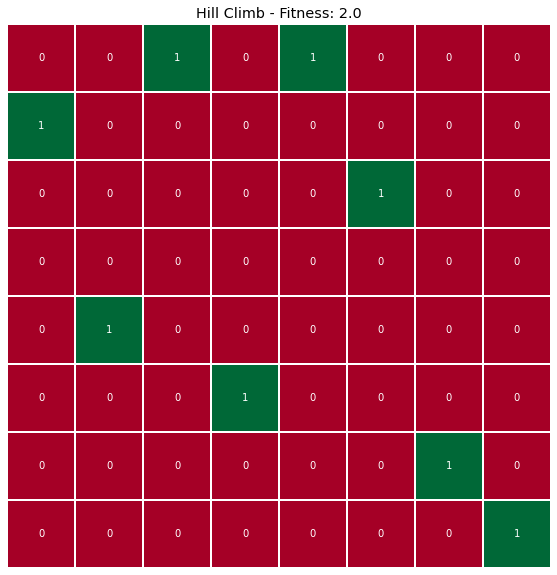

In [7]:
visualize(hill_board, 'Hill Climb', hill_best_fitness)


### Caminata aleatoria

In [8]:
% % timeit
random_hill_best_state, random_hill_best_fitness, _ = mlr.random_hill_climb(
    problem, max_iters=1000, restarts=0, init_state=init_state, curve=True, random_state=0)


UsageError: Line magic function `%` not found.


In [9]:
rand_hill_best_state, rand_hill_best_fitness, _ = mlr.random_hill_climb(problem, max_iters=100000, restarts=0,
                                                                        init_state=init_state, curve=True, random_state=0)
rand_hill_positions = position_creator(rand_hill_best_state)


In [10]:
print(f'Random Hill Climb best fitness: {rand_hill_best_fitness}')
rand_hill_board = board_printer(rand_hill_positions)


Random Hill Climb best fitness: 3.0


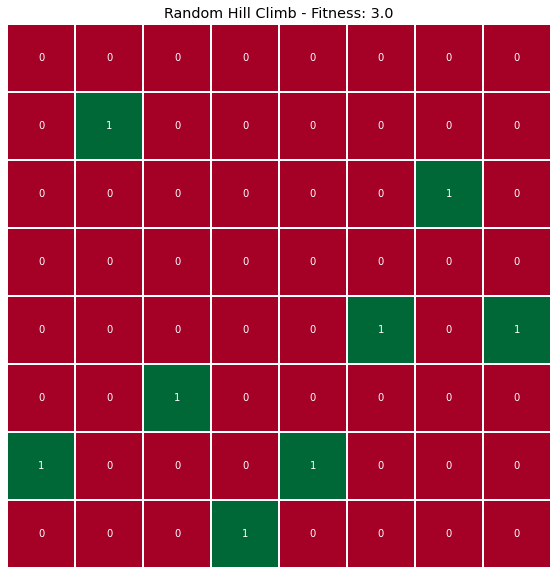

In [11]:
visualize(rand_hill_board, 'Random Hill Climb', rand_hill_best_fitness)


### Recocido simulado

In [12]:
% % timeit
ann_best_state, ann_best_fitness, _ = mlr.simulated_annealing(problem, schedule=schedule, max_attempts=100,
                                                              max_iters=1000, init_state=init_state,
                                                              random_state=1)


UsageError: Line magic function `%` not found.


In [13]:
ann_best_state, ann_best_fitness, _ = mlr.simulated_annealing(problem, schedule=schedule, max_attempts=100,
                                                              max_iters=10000, init_state=init_state,
                                                              random_state=1)
ann_positions = position_creator(ann_best_state)


In [14]:
print(f'Simulated Annealing best fitness: {ann_best_fitness}')
ann_board = board_printer(ann_positions)


Simulated Annealing best fitness: 0.0


Al parecer ninguno de los 2 algoritmos produce una solución válida. Hemos incrementado el número de iteraciones a 1000 para todos los algoritmos, e incluso así los algoritmos de hill climbing no pudieron encontrar una solución

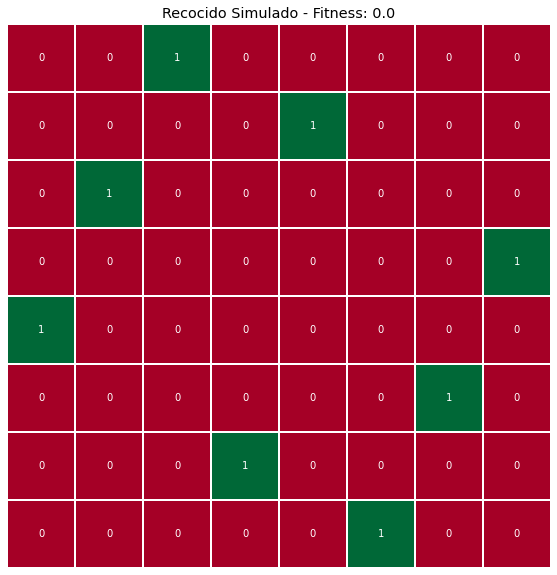

In [15]:
visualize(ann_board, 'Recocido Simulado', ann_best_fitness)


## Problema 2: Travelling Salesperson Problem (TSP)

La siguiente figura muestra una colección de puntos en el plano, los cuales se quieren unir con lineas rectas de tal forma que se forme una figura cerrada. Cada punto sólo puede estar conectado a otros dos puntos.

![](img/2022-03-11-07-44-07.png)

Utilicen los algoritmos de búsqueda voraz y de recocido simulado para encontrar la forma como se conectarían los puntos, de tal forma que la suma de las longitudes de las líneas que conectan la figura sea la menor posible. ¿Con qué algoritmo se obtiene los mejores resultados?


In [16]:
# Create a list of coordinates
np.random.seed(0)
n_cities = 31
max_range = 200
cities = np.random.randint(low=0, high=max_range, size=(n_cities, 2))
cities_tsp = [(x, y) for x, y in cities]


Text(0.5, 1.0, 'TSP Cities')

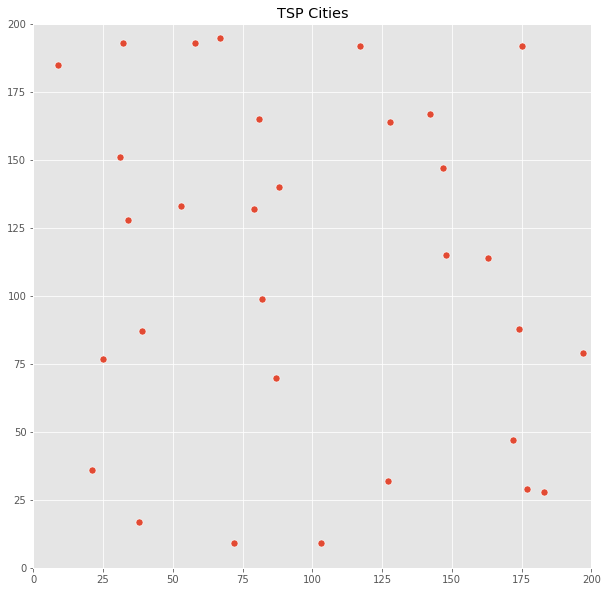

In [17]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x=cities[:, 0], y=cities[:, 1], s=50)
ax.set_xlim(0, max_range)
ax.set_ylim(0, max_range)
ax.set_title('TSP Cities')


### Usando librería `mlrose`

In [18]:
fitness_coords = mlr.TravellingSales(coords=cities_tsp)


In [19]:
problem_fit = mlr.TSPOpt(
    length=n_cities, fitness_fn=fitness_coords, maximize=False)


In [20]:
def route_printer(order):
    for i in range(len(order)):
        if i == len(order) - 1:
            print(order[i])
        else:
            print(order[i], end=' -> ')


#### Recocido simulado

In [21]:
ann_tsp_best_state, ann_tsp_best_fitness, _ = mlr.simulated_annealing(
    problem_fit, schedule=schedule, max_attempts=10000, random_state=0)


In [22]:
ann_tsp_best_fitness


1200.8700911840235

In [23]:
ann_tsp_best_state


array([10, 28, 30,  6, 27, 19, 15, 18,  8, 11,  4, 29, 12,  3, 17, 25, 13,
       24,  9, 14,  0, 22,  5, 16, 26, 23, 21, 20,  7,  2,  1])

In [24]:
route_printer(ann_tsp_best_state)


10 -> 28 -> 30 -> 6 -> 27 -> 19 -> 15 -> 18 -> 8 -> 11 -> 4 -> 29 -> 12 -> 3 -> 17 -> 25 -> 13 -> 24 -> 9 -> 14 -> 0 -> 22 -> 5 -> 16 -> 26 -> 23 -> 21 -> 20 -> 7 -> 2 -> 1


### Usando librería `simpleai`

In [28]:
from scipy.spatial.distance import cdist

cities_tsp = np.array(cities_tsp)
distances = cdist(cities_tsp, cities_tsp, metric='euclidean')


Podríamos usar esto https://github.com/vkinoshita/tsp